# Import libraries and files

In [ ]:
import numpy as np
import nibabel.processing as nibp
import os
import nibabel as nib
import math
import random
import sklearn.preprocessing
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
random.seed(42)

In [ ]:
def create_signal():
    ### functions to generate noise and signal separately as a sine function with noise, and noise and signal has different range of b's
    a_n = random.uniform(5,10)
    b_n = random.uniform(0.1,1)
    c_n = random.uniform(200,300)
    y_n = np.array([a_n*np.sin(i*b_n)+c_n+0.01*random.randint(-100,100) for i in range(156)])
    a_s = random.uniform(5,10)
    b_s = random.uniform(1,3)
    c_s = random.uniform(200,300)
    y_s = np.array([a_s*np.sin(i*b_s)+c_s+0.01*random.randint(-100,100) for i in range(156)])
    return [y_n, y_s]

In [ ]:
num_obs = 10000 #number of observations
ground_truth_list = np.zeros([num_obs, 156]) # initionalization of ground truths
observation_list = np.zeros([num_obs, 156]) # initionalization of observations
noise_list = np.zeros([num_obs, 156]) # initionalization of noises
# generation of noises and ground truths
for i in range(num_obs):
    [noise_list[i],ground_truth_list[i]] = create_signal()

In [ ]:
# subtracting means from noises and ground truths across each seqeunce
noise_list = noise_list - np.repeat(np.reshape(np.mean(noise_list,axis=1),(noise_list.shape[0],1)),noise_list.shape[1],axis=1)
ground_truth_list = ground_truth_list - np.repeat(np.reshape(np.mean(ground_truth_list,axis=1),(ground_truth_list.shape[0],1)),ground_truth_list.shape[1],axis=1)

In [ ]:
class Scaler():
    ## used to normalize sequences
    def __init__(self,inputs):
        self.data = inputs
        self.mean = np.mean(inputs,axis=1)
        self.std = np.std(inputs, axis=1)
        self.vox, self.time = inputs.shape
    def transform(self,inputs):
        self.mean = np.reshape(self.mean,(self.vox,1))
        self.m_large = np.repeat(self.mean,self.time,axis=1)
        self.std = np.reshape(self.std,(self.vox,1))
        self.s_large = np.repeat(self.std,self.time,axis=1)
        return np.divide(inputs-self.m_large,self.s_large)
    def inverse_transform(self,outputs):
        return np.multiply(outputs,self.s_large)+self.m_large

In [ ]:
# normalize the grounth truth
gt_scale = Scaler(ground_truth_list)
gt_list = gt_scale.transform(ground_truth_list)

In [ ]:
# linear combination of noise and ground truth, leading to the observations, and standard deviation is arbitrary
std = 1
lamb = math.sqrt(std**2/noise_list.std()**2)
noise_c = lamb * noise_list
print(noise_c.mean())
print(noise_c.std())
# print(noise_c.shape)
observation_list = gt_list+noise_c
# print(observation_list.mean())
# print(observation_list.std())

4.652802359918823e-17
1.0000000000000002


In [ ]:
# non-linear combination of noise and ground truth, leading to the observations, and standard deviation is arbitrary
# std = 1
# cube_root = np.cbrt(noise_list)
# lamb = (std**2/(cube_root.std())**2)**(3/2)
# noise_c = np.cbrt(lamb * noise_list)
# print(noise_c.mean())
# print(noise_c.std())
# observation_list = gt_list+noise_c
# # print(observation_list.mean())
# # print(observation_list.std())

In [ ]:
# normalization of observations and noises
obs_scale = Scaler(observation_list)
obs_list = obs_scale.transform(observation_list)
noi_scale = Scaler(noise_list)
noi_list = noi_scale.transform(noise_list)

In [ ]:
print(obs_list.mean())
print(obs_list.std())
print(noi_list.mean())
print(noi_list.std())

-2.6019072936087003e-19
1.0000000000000002
3.797532089358869e-19
1.0


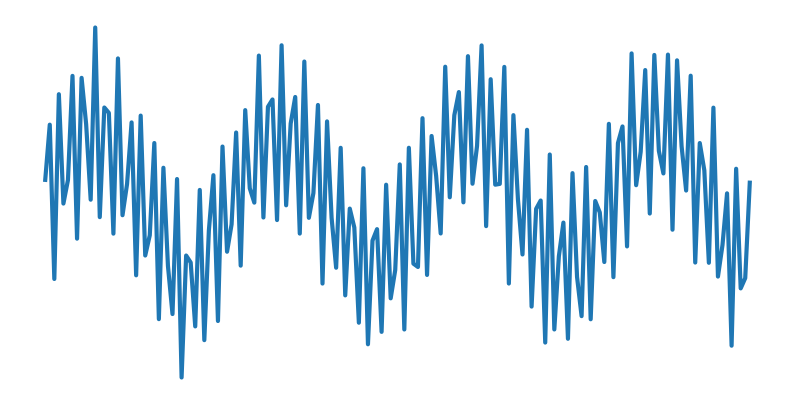

In [ ]:
x = [i for i in range(156)]
fig,ax = plt.subplots(figsize = (10,5))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
# plt.plot(x,gt_list[40],'-', label = 'ground truth',linewidth=3)
# plt.plot(x,outputs_test_t[40].squeeze().cpu().detach().numpy(),'-',label = 'DeepCorr',linewidth=3)
# plt.plot(x,func_denoised[40],'-', label = 'ground truth',linewidth=3)
# plt.legend(loc='upper right', prop={'size': 20})
# plt.plot(x,noise_list[40],'-',linewidth=3,)
plt.plot(x,observation_list[40],'-',linewidth=3)
plt.axis('off')
plt.savefig('drive/MyDrive/dataset/z+s_std=1/observation.png',transparent=True,dpi=500)

Text(0.5, 1.0, 'noise')

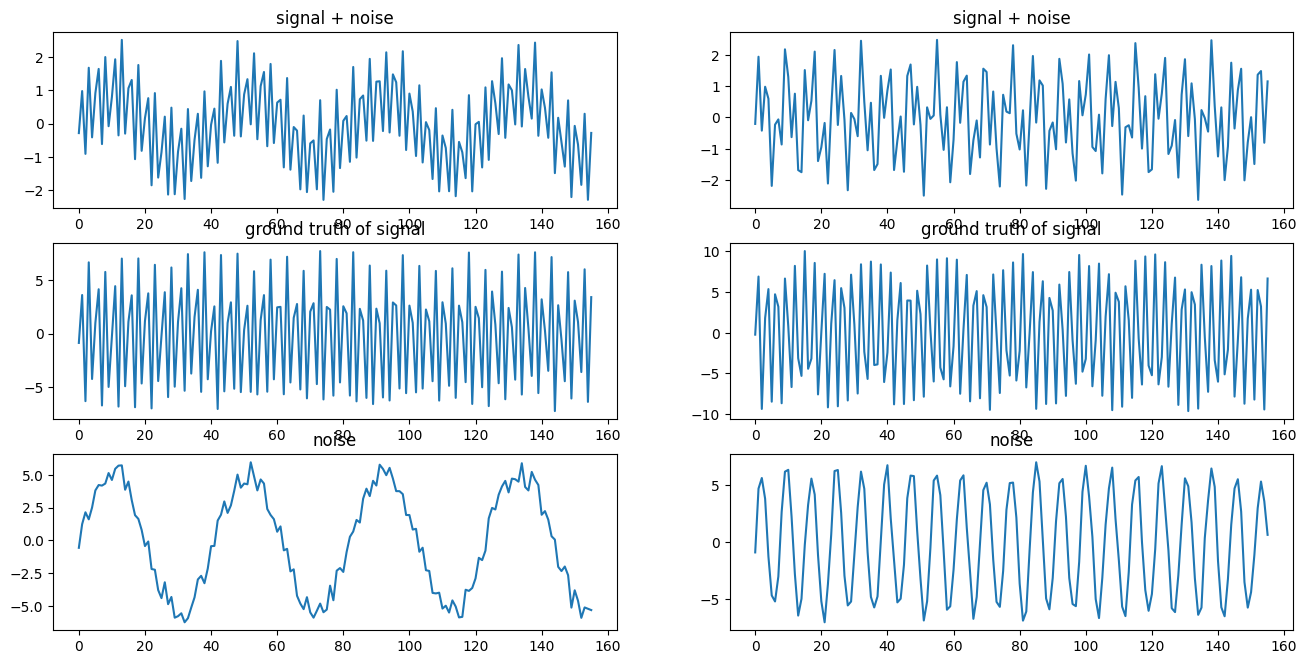

In [ ]:
x = [i for i in range(156)]
plt.figure(figsize = (16,16))
plt.subplot(6,2,1)
plt.plot(x,observation_list[900],'-')
plt.title('signal + noise')
plt.subplot(6,2,2)
plt.plot(x,observation_list[24],'-')
plt.title('signal + noise')
plt.subplot(6,2,3)
plt.plot(x,ground_truth_list[900],'-')
plt.title('ground truth of signal')
plt.subplot(6,2,4)
plt.plot(x,ground_truth_list[24],'-')
plt.title('ground truth of signal')
plt.subplot(6,2,5)
plt.plot(x,noise_list[900],'-')
plt.title('noise')
plt.subplot(6,2,6)
plt.plot(x,noise_list[24],'-')
plt.title('noise')

Text(0.5, 1.0, 'noise')

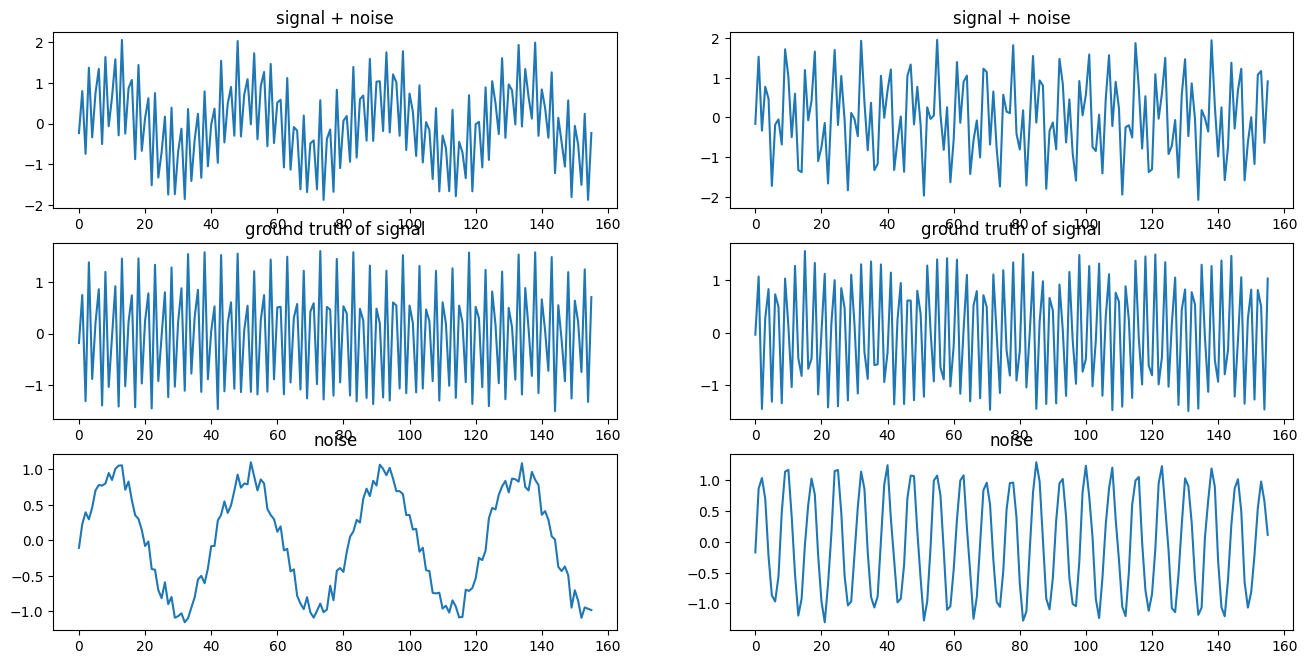

In [ ]:
x = [i for i in range(156)]
plt.figure(figsize = (16,16))
plt.subplot(6,2,1)
plt.plot(x,obs_list[900],'-')
plt.title('signal + noise')
plt.subplot(6,2,2)
plt.plot(x,obs_list[24],'-')
plt.title('signal + noise')
plt.subplot(6,2,3)
plt.plot(x,gt_list[900],'-')
plt.title('ground truth of signal')
plt.subplot(6,2,4)
plt.plot(x,gt_list[24],'-')
plt.title('ground truth of signal')
plt.subplot(6,2,5)
plt.plot(x,noise_c[900],'-')
plt.title('noise')
plt.subplot(6,2,6)
plt.plot(x,noise_c[24],'-')
plt.title('noise')

# DataLoader

In [ ]:
import torch
class PathDataset(torch.utils.data.Dataset):
  def __init__(self, X, Y, Z):
    self.obs = X
    self.gt = Y
    self.noi = Z

  def __len__(self):
    return self.gt.shape[0]

  def __getitem__(self, index):
    ### noise is multiplied by a beta coefficient
    observation = self.obs[index]
    ground_truth = self.gt[index]
    noise = self.noi[index]
    s = 2*random.beta(4,4,1)
    noise_aug = s*noise

    return observation, ground_truth, noise_aug

In [ ]:
# initiate dataset in pytorch
train_inputs = PathDataset(obs_list,gt_list,noi_list)

In [ ]:
# dataload
train_in = torch.utils.data.DataLoader(train_inputs, batch_size=64,
                                             shuffle=True, num_workers=1)

# cVAE model

In [ ]:
from typing import List, Callable, Union, Any, TypeVar, Tuple
# from torch import tensor as Tensor

Tensor = TypeVar('torch.tensor')

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

class cVAE(nn.Module):


    def __init__(self,in_channels: int,latent_dim: int,hidden_dims: List = None) -> None:
        super(cVAE, self).__init__()

        self.latent_dim = latent_dim
        self.in_channels = in_channels
        self.hidden_dims = hidden_dims

        modules_z = []
        if hidden_dims is None:
            hidden_dims = [32, 64, 128, 128]

        # Build Encoders
        for h_dim in hidden_dims:
            modules_z.append(
                nn.Sequential(
                    nn.Conv1d(in_channels, out_channels=h_dim,
                              kernel_size= 3, stride= 2, padding  = 1),
                    nn.BatchNorm1d(h_dim),
                    nn.LeakyReLU())
            )
            in_channels = h_dim

        self.encoder_z = nn.Sequential(*modules_z)
        self.fc_mu_z = nn.Linear(hidden_dims[-1]*10, latent_dim)
        self.fc_var_z = nn.Linear(hidden_dims[-1]*10, latent_dim)

        modules_s = []
        in_channels = self.in_channels
        for h_dim in hidden_dims:
            modules_s.append(
                nn.Sequential(
                    nn.Conv1d(in_channels, out_channels=h_dim,
                              kernel_size= 3, stride= 2, padding  = 1),
                    nn.BatchNorm1d(h_dim),
                    nn.LeakyReLU())
            )
            in_channels = h_dim

        self.encoder_s = nn.Sequential(*modules_s)
        self.fc_mu_s = nn.Linear(hidden_dims[-1]*10, latent_dim)
        self.fc_var_s = nn.Linear(hidden_dims[-1]*10, latent_dim)


        # Build Decoder
        modules = []

        self.decoder_input = nn.Linear(2*latent_dim, hidden_dims[-1] * 10)

        hidden_dims.reverse()


        for i in range(len(hidden_dims) - 1):
            if i//2==0:
                modules.append(
                    nn.Sequential(
                        nn.ConvTranspose1d(hidden_dims[i],
                                       hidden_dims[i + 1],
                                       kernel_size=3,
                                       stride = 2,
                                       padding=1,
                                       output_padding=1),
                        nn.BatchNorm1d(hidden_dims[i + 1]),
                        nn.LeakyReLU())
                )
            else:
                modules.append(
                    nn.Sequential(
                        nn.ConvTranspose1d(hidden_dims[i],
                                       hidden_dims[i + 1],
                                       kernel_size=3,
                                       stride = 2,
                                       padding=1,
                                       output_padding=0),
                        nn.BatchNorm1d(hidden_dims[i + 1]),
                        nn.LeakyReLU())
                )



        self.decoder = nn.Sequential(*modules)

        self.final_layer = nn.Sequential(
                            nn.ConvTranspose1d(hidden_dims[-1],
                                               hidden_dims[-1],
                                               kernel_size=3,
                                               stride=2,
                                               padding=2,
                                               output_padding=1),
                            nn.BatchNorm1d(hidden_dims[-1]),
                            nn.LeakyReLU(),
                            nn.Conv1d(hidden_dims[-1], out_channels= 1,
                                      kernel_size= 3, padding= 1))

    def encode_z(self, input: Tensor) -> List[Tensor]:
        """
        Encodes the input by passing through the encoder network
        and returns the latent codes for noise
        """
        result = self.encoder_z(input)
        result = torch.flatten(result, start_dim=1)

        # Split the result into mu and var components
        # of the latent Gaussian distribution
        mu = self.fc_mu_z(result)
        log_var = self.fc_var_z(result)

        return [mu, log_var]

    def encode_s(self, input: Tensor) -> List[Tensor]:
        """
        Encodes the input by passing through the encoder network
        and returns the latent codes for signal
        """
        result = self.encoder_s(input)
        result = torch.flatten(result, start_dim=1)

        # Split the result into mu and var components
        # of the latent Gaussian distribution
        mu = self.fc_mu_s(result)
        log_var = self.fc_var_s(result)

        return [mu, log_var]

    def decode(self, z: Tensor) -> Tensor:
        """
        Maps the given latent codes
        onto the image space.
        """
        result = self.decoder_input(z)
        result = result.view(-1,128,10)
        result = self.decoder(result)
        result = self.final_layer(result)
        return result

    def reparameterize(self, mu: Tensor, logvar: Tensor) -> Tensor:
        """
        Reparameterization trick to sample from N(mu, var) from
        N(0,1).
        """
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward_tg(self, input: Tensor) -> List[Tensor]:
        """
        Forward the input to both encoder s and z and concatenate them
        """
        tg_mu_z, tg_log_var_z = self.encode_z(input)
        tg_mu_s, tg_log_var_s = self.encode_s(input)
        tg_z = self.reparameterize(tg_mu_z, tg_log_var_z)
        tg_s = self.reparameterize(tg_mu_s, tg_log_var_s)
        output = self.decode(torch.cat((tg_z, tg_s),1))
        return  [output, input, tg_mu_z, tg_log_var_z, tg_mu_s, tg_log_var_s,tg_z,tg_s]

    def forward_bg(self, input: Tensor) -> List[Tensor]:
        """
        Forward the input to both encoder s only and make another half of latent space 0s
        """
        bg_mu_s, bg_log_var_s = self.encode_s(input)
        bg_s = self.reparameterize(bg_mu_s, bg_log_var_s)
        zeros = torch.zeros_like(bg_s)
        output = self.decode(torch.cat((zeros, bg_s),1))
        return  [output, input, bg_mu_s, bg_log_var_s]

    def forward_fg(self, input: Tensor) -> List[Tensor]:
        """
        Forward the input to both encoder z only and make another half of latent space 0s
        """
        fg_mu_z, fg_log_var_z = self.encode_z(input)
        tg_z = self.reparameterize(fg_mu_z, fg_log_var_z)
        zeros = torch.zeros_like(tg_z)
        output = self.decode(torch.cat((tg_z, zeros),1))
        return  [output, input, fg_mu_z, fg_log_var_z]

    def loss_function(self,
                      *args,
                      ) -> dict:
        """
        Computes the VAE loss function.
        KL(N(\mu, \sigma), N(0, 1)) = \log \frac{1}{\sigma} + \frac{\sigma^2 + \mu^2}{2} - \frac{1}{2}
        """
        beta = 0.00001 # ration of kl loss compared to reconstruction loss

        recons_tg = args[0]
        input_tg = args[1]
        tg_mu_z = args[2]
        tg_log_var_z = args[3]
        tg_mu_s = args[4]
        tg_log_var_s = args[5]
        tg_z = args[6]
        tg_s = args[7]
        recons_bg = args[8]
        input_bg = args[9]
        bg_mu_s = args[10]
        bg_log_var_s = args[11]

        recons_loss = F.mse_loss(recons_tg, input_tg)
        recons_loss += F.mse_loss(recons_bg, input_bg)

        kld_loss = 1 + tg_log_var_z - tg_mu_z ** 2 - tg_log_var_z.exp()
        kld_loss += 1 + tg_log_var_s - tg_mu_s ** 2 - tg_log_var_s.exp()
        kld_loss += 1 + bg_log_var_s - bg_mu_s ** 2 - bg_log_var_s.exp()
        kld_loss = torch.mean(-0.5 * torch.sum(kld_loss, dim = 1), dim = 0)

        loss = torch.mean(recons_loss + beta*kld_loss)
        return {'loss': loss, 'Reconstruction_Loss':recons_loss.detach(), 'KLD': kld_loss.detach()}

    def sample(self,
               num_samples:int,
               current_device: int) -> Tensor:
        """
        Samples from the latent space and return the corresponding
        image space map.
        """
        z = torch.randn(num_samples,
                        self.latent_dim)
        z = z.to(current_device)
        samples = self.decode(z)
        return samples

    def generate(self, x: Tensor) -> Tensor:
        """
        Given an input image x, returns the reconstructed image
        """
        return self.forward_fg(x)[0]

In [ ]:
# initiate the model
model = cVAE(1,16)

In [ ]:
model # model structure

cVAE(
  (encoder_z): Sequential(
    (0): Sequential(
      (0): Conv1d(1, 32, kernel_size=(3,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv1d(32, 64, kernel_size=(3,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv1d(64, 128, kernel_size=(3,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv1d(128, 128, kernel_size=(3,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
  )
  (fc_mu_z): Linear(in_features=128

In [ ]:
# optimizer
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [ ]:
print(len(train_in))

157


# Training the Model

In [ ]:
def correlation(x,y):
  # calculate the correlation between each pair of sequence and returns mean and 90 percentiles of correlations
  x_mean = np.repeat(np.reshape(x.mean(axis=1),(x.shape[0],1)),x.shape[1],axis=1)
  y_mean = np.repeat(np.reshape(y.mean(axis=1),(y.shape[0],1)),y.shape[1],axis=1)
  cov = (x-x_mean)*(y-y_mean)
  r_row = cov.sum(axis=1)/(x.std(axis=1)*y.std(axis=1)*x.shape[1])
  r = r_row.sum()/x.shape[0]
  r_low = np.percentile(r_row,5)
  r_high = np.percentile(r_row,95)
  return (r, r_low, r_high)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
batch_size = 64
epoch_num = 50
running_loss_L = []
running_recons_L = []
running_KLD_L = []
val_loss_L = []
val_recons_L = []
val_KLD_L = []
test_correlation_L = []
test_loss_n_L = []
test_percentile_L = []

for epoch in range(epoch_num):  # loop over the dataset multiple times
    print('Epoch {}/{}'.format(epoch, epoch_num-1))
    print('-' * 10)

    running_loss = 0.0
    running_reconstruction_loss = 0.0
    running_KLD = 0.0
    test_correlation = 0.0
    test_rec_loss_n = 0.0
    test_percentile = []

    # Iterate over data.
    dataloader_iter_in = iter(train_in)
    for i in range(len(train_in)):
        inputs_gm,inputs_gt,inputs_cf = next(dataloader_iter_in)

        inputs_gm = inputs_gm.unsqueeze(1).float().to(device)
        inputs_cf = inputs_cf.unsqueeze(1).float().to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # encoder + decoder
        [outputs_gm, inputs_gm, tg_mu_z, tg_log_var_z, tg_mu_s, tg_log_var_s,tg_z,tg_x] = model.forward_tg(inputs_gm)
        [outputs_cf, inputs_cf, bg_mu_s, bg_log_var_s] = model.forward_bg(inputs_cf)
        outputs = torch.concat((outputs_gm,outputs_cf),1)
        loss = model.loss_function(outputs_gm, inputs_gm, tg_mu_z, tg_log_var_z, tg_mu_s, tg_log_var_s,tg_z,tg_x, outputs_cf, inputs_cf, bg_mu_s, bg_log_var_s)
        # backward + optimize
        loss['loss'].backward()
        optimizer.step()
        # print statistics
        running_loss += loss['loss']
        running_reconstruction_loss += loss['Reconstruction_Loss']
        running_KLD += loss['KLD']
    # validation
    with torch.no_grad():
        inputs_test = torch.tensor(obs_list).unsqueeze(1).float().to(device)
        inputs_gt_n = torch.tensor(gt_list).unsqueeze(1).float().to(device)
        outputs_test_n = model.generate(inputs_test)
        output_scale = Scaler(outputs_test_n.squeeze().cpu().numpy())
        outputs_test = output_scale.transform(outputs_test_n.squeeze().cpu().numpy())
        outputs_test_t = torch.from_numpy(outputs_test).unsqueeze(1).float().to(device)
        test_rec_loss_n = F.mse_loss(outputs_test_t,inputs_gt_n)
        test_correlation = correlation(gt_list,outputs_test)[0]
        test_percentile = correlation(gt_list,outputs_test)[1:]


    epoch_running_loss = running_loss / (len(train_in)*2)
    epoch_running_reconstruction_loss = running_reconstruction_loss / (len(train_in)*2)
    epoch_running_KLD = running_KLD / (len(train_in)*2)
    epoch_test_correlation = test_correlation
    epoch_test_loss_n = test_rec_loss_n
    epoch_test_percentile = test_percentile
    print('Training Loss: {:.4f} Training Reconstruction Loss: {:.4f} Training KLD {:.4f}'.format(epoch_running_loss, epoch_running_reconstruction_loss, epoch_running_KLD))
    print('Test Loss normalization: {:.4f} Test Correlation: {:.4f} Test Percentile ({:.4f},{:.4f})'.format(epoch_test_loss_n,epoch_test_correlation,epoch_test_percentile[0],epoch_test_percentile[1]))
    print('')
    print()
    running_loss_L.append(epoch_running_loss)
    running_recons_L.append(epoch_running_reconstruction_loss)
    running_KLD_L.append(epoch_running_KLD)
    test_correlation_L.append(epoch_test_correlation)
    test_loss_n_L.append(epoch_test_loss_n)
    test_percentile_L.append(epoch_test_percentile)

print('Finished Training')

Epoch 0/49
----------
Training Loss: 0.5216 Training Reconstruction Loss: 0.5206 Training KLD 98.4343
Test Loss normalization: 1.8779 Test Correlation: 0.0610 Test Percentile (-0.0049,0.2522)


Epoch 1/49
----------
Training Loss: 0.2752 Training Reconstruction Loss: 0.2738 Training KLD 137.2345
Test Loss normalization: 1.7438 Test Correlation: 0.1281 Test Percentile (0.0012,0.8878)


Epoch 2/49
----------
Training Loss: 0.2575 Training Reconstruction Loss: 0.2561 Training KLD 139.6887
Test Loss normalization: 1.6385 Test Correlation: 0.1807 Test Percentile (0.0049,0.9320)


Epoch 3/49
----------
Training Loss: 0.2446 Training Reconstruction Loss: 0.2432 Training KLD 141.7067
Test Loss normalization: 1.5648 Test Correlation: 0.2176 Test Percentile (0.0074,0.9415)


Epoch 4/49
----------
Training Loss: 0.2349 Training Reconstruction Loss: 0.2335 Training KLD 141.7817
Test Loss normalization: 1.4842 Test Correlation: 0.2579 Test Percentile (0.0160,0.9501)


Epoch 5/49
----------
Training

In [ ]:
outputs_test.shape

(10000, 156)

In [ ]:
from numpy import savetxt
savetxt('drive/MyDrive/dataset/z+s_std=1/GroundTruth.csv', gt_list, delimiter=',')
savetxt('drive/MyDrive/dataset/z+s_std=1/denoised_DeepCor.csv', outputs_test, delimiter=',')

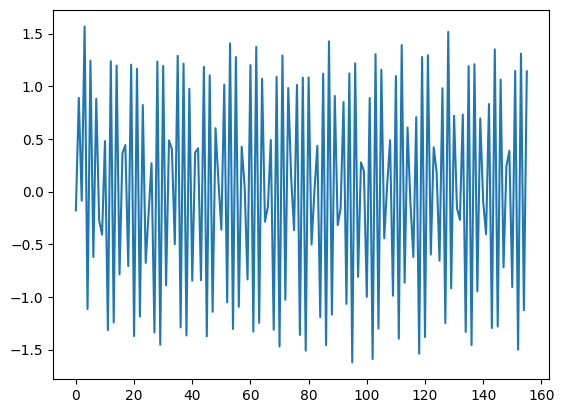

In [ ]:
plt.plot(outputs_test_t[0,0,:].cpu().detach().numpy())

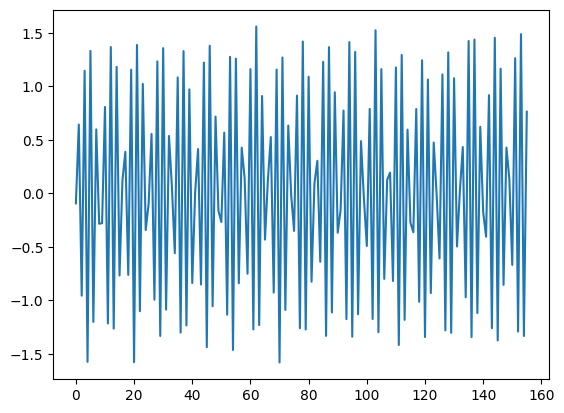

In [ ]:
plt.plot(inputs_gt_n[0,0,:].cpu().detach().numpy())

# Show Training Result

In [ ]:
running_loss_L2 = [item.detach().cpu().numpy() for item in running_loss_L]
running_loss_L2 = np.array(running_loss_L2)
running_recons_L2 = [item.detach().cpu().numpy() for item in running_recons_L]
running_recons_L2 = np.array(running_recons_L2)
running_KLD_L2 = [item.detach().cpu().numpy() for item in running_KLD_L]
running_KLD_L2 = np.array(running_KLD_L2)

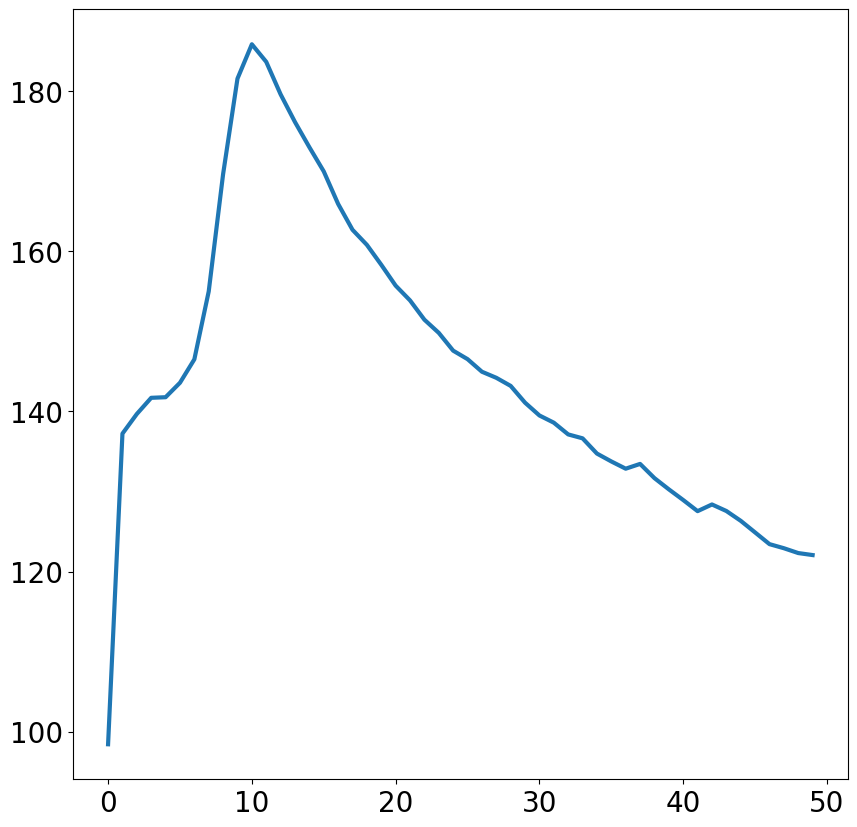

In [ ]:
num_list = [i for i in range(epoch_num)]
num_list = [i for i in range(len(running_loss_L2))]
fig,ax = plt.subplots(figsize =(10,10))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
# plt.subplot(1,3,1)
# plt.plot(num_list,running_loss_L2, '-',linewidth=3)
# plt.title('Training Loss',FontSize=30,FontName='Arial')
# plt.xlabel('Epoches',FontSize=24,FontName='Arial')
# plt.subplot(1,3,2)
# plt.plot(num_list,running_recons_L2, '-',linewidth=3)
# plt.title('Training Reconstruction Loss',FontSize=16,FontName='Arial')
# plt.xlabel('Epoches',FontSize=14,FontName='Arial')
# plt.subplot(1,3,3)
plt.plot(num_list,running_KLD_L2, '-',linewidth=3)
# plt.title('Training KLD Loss',FontSize=16,FontName='Arial')
# plt.xlabel('Epoches',FontSize=14,FontName='Arial')
# plt.savefig('drive/MyDrive/dataset/z+c(s)_std=2/training_loss.png',dpi=400)
# plt.savefig('drive/MyDrive/dataset/z+c(s)_std=2/training_rec_loss.png',dpi=400)
plt.savefig('drive/MyDrive/dataset/z+c(s)_std=2/training_kld_loss.png',dpi=400)

Text(0.5, 1.0, 'denoised')

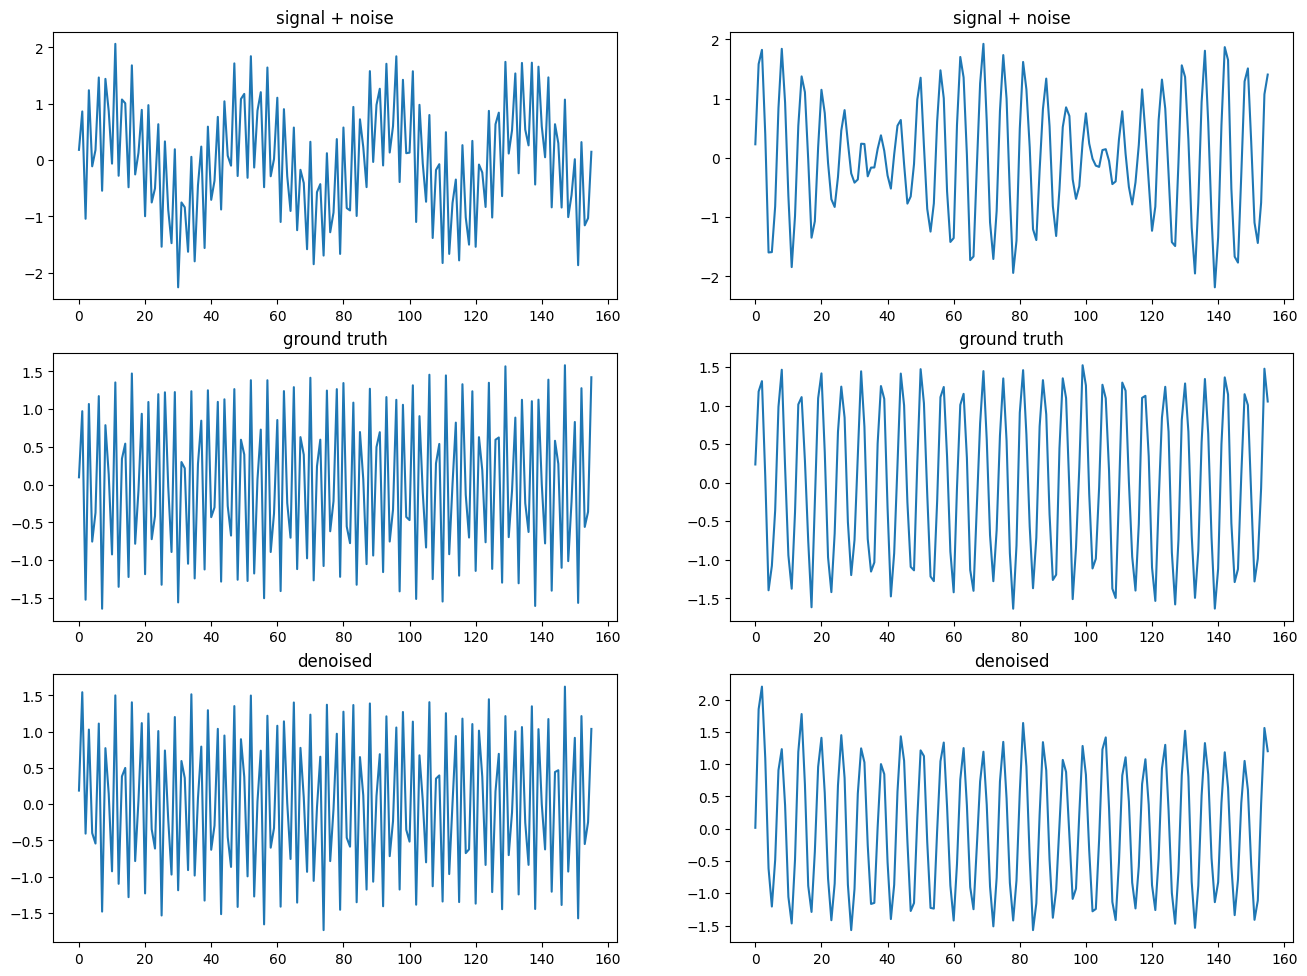

In [ ]:
x = [i for i in range(156)]
plt.figure(figsize = (16,16))
plt.subplot(4,2,1)
plt.plot(x,obs_list[40],'-')
plt.title('signal + noise')
plt.subplot(4,2,2)
plt.plot(x,obs_list[2],'-')
plt.title('signal + noise')
plt.subplot(4,2,3)
plt.plot(x,gt_list[40],'-')
plt.title('ground truth')
plt.subplot(4,2,4)
plt.plot(x,gt_list[2],'-')
plt.title('ground truth')
plt.subplot(4,2,5)
plt.plot(x,outputs_test_t[40].squeeze().cpu().detach().numpy(),'-')
plt.title('denoised')
plt.subplot(4,2,6)
plt.plot(x,outputs_test_t[2].squeeze().cpu().detach().numpy(),'-')
plt.title('denoised')

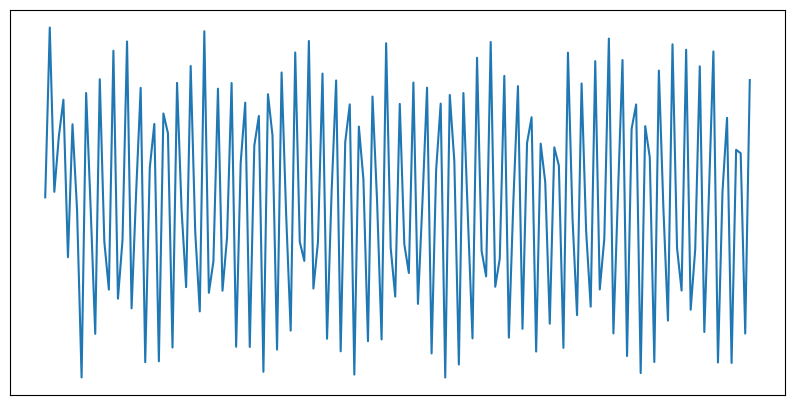

In [ ]:
fig,ax = plt.subplots(figsize = (10,5))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# plt.plot(x,gt_list[40],'-', label = 'ground truth')
# plt.plot(x,outputs_test_n[40].squeeze().cpu().detach().numpy(),'-',label = 'DeepCorr')
# plt.legend(loc='upper right', prop={'size': 20})
plt.plot(x,outputs_test_t[24].squeeze().cpu().detach().numpy(),'-')
# plt.savefig('drive/MyDrive/dataset/z+s_std=1/DeepCorr.png',dpi=500)

In [ ]:
# test_loss_L2 = [item.detach().cpu().numpy() for item in test_loss_L]
# test_loss_L2 = np.array(test_loss_L2)
test_loss_n_L2 = [item.detach().cpu().numpy() for item in test_loss_n_L]
test_loss_n_L2 = np.array(test_loss_n_L2)
test_correlation_L2 = [item for item in test_correlation_L]
test_correlation_L2 = np.array(test_correlation_L2)
test_percentile_low = np.array([item[0] for item in test_percentile_L])
test_percentile_high = np.array([item[1] for item in test_percentile_L])

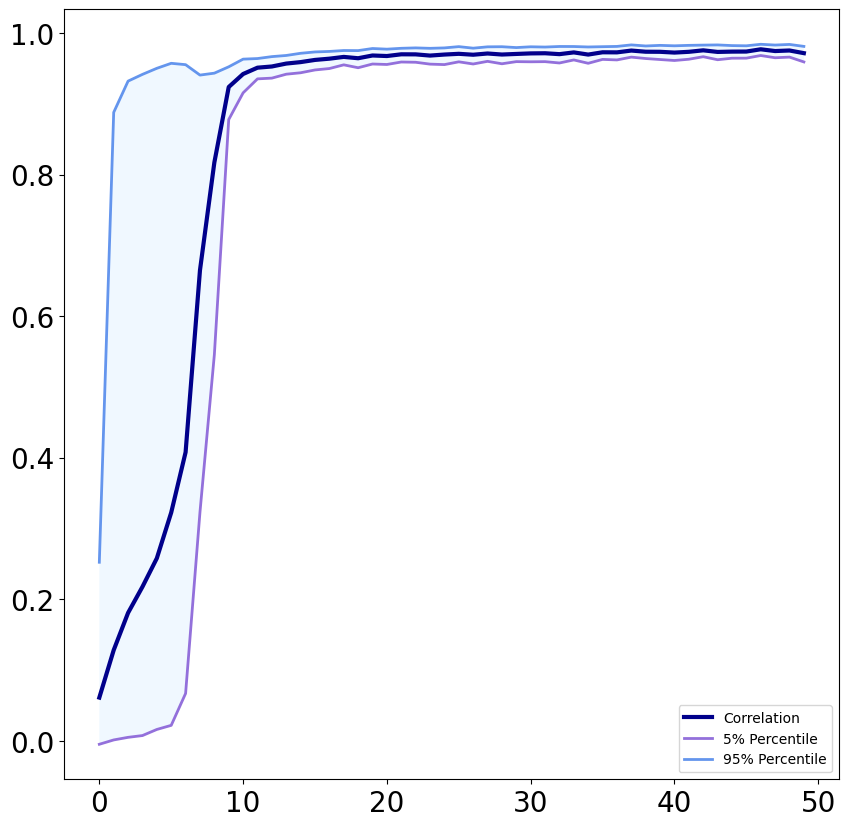

In [ ]:
# num_list = [i for i in range(len(running_loss_L2))]
fig,ax = plt.subplots(figsize = (10,10))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
# plt.subplot(1,2,1)
plt.plot(num_list,test_correlation_L2, '-',linewidth=3, color = 'darkblue')
plt.plot(num_list,test_percentile_low, '-',linewidth=2, color = 'mediumpurple')
plt.plot(num_list,test_percentile_high, '-',linewidth=2, color = 'cornflowerblue')
plt.fill_between(num_list, test_percentile_low, test_percentile_high, where=test_percentile_low <= test_percentile_high, facecolor='aliceblue', interpolate=True)
plt.legend(['Correlation', '5% Percentile', '95% Percentile'])
# plt.title('Testing loss normalization')
plt.savefig('drive/MyDrive/dataset/z+c(s)_std=2/correlation.png',dpi=400)

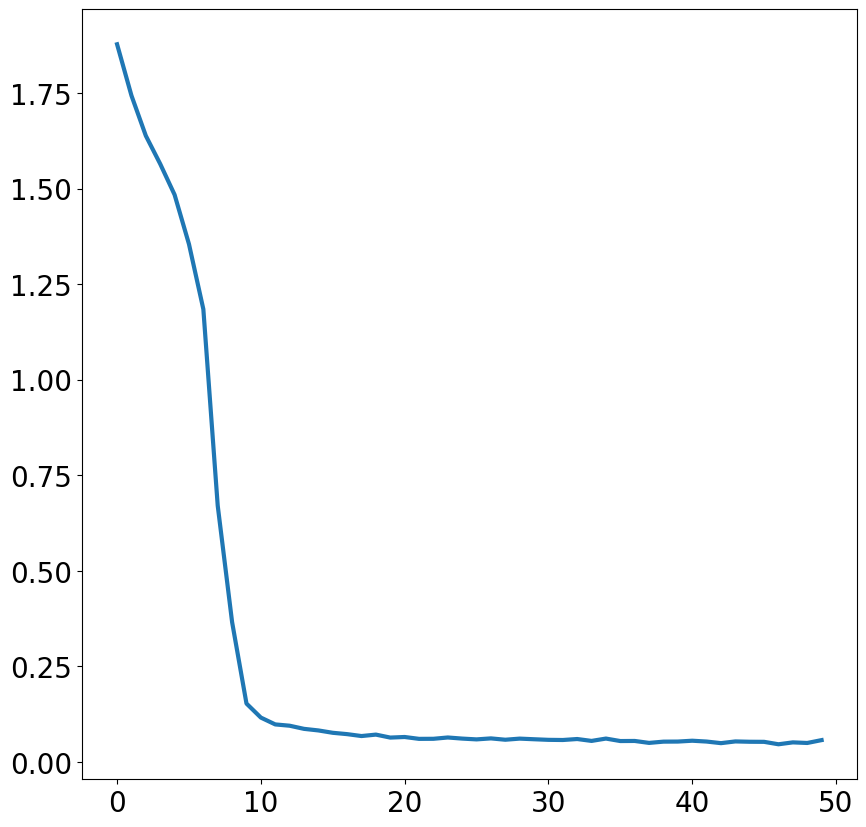

In [ ]:
num_list = [i for i in range(len(running_loss_L2))]
fig,ax = plt.subplots(figsize = (10,10))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
# plt.subplot(1,2,1)
plt.plot(num_list,test_loss_n_L2, '-',linewidth=3)
# plt.title('Testing loss normalization')
plt.savefig('drive/MyDrive/dataset/z+c(s)_std=2/testing_loss.png',dpi=400)

# CompCorr

In [ ]:
from sklearn.decomposition import PCA
from sklearn import linear_model

# PCA likes the time dimension as first. Let's transpose our data.
func_gm_c = np.transpose(obs_list)
func_confounds_c = np.transpose(noi_list)
# Fit PCA and extract PC timecourses
pca = PCA(n_components = 5)
pca.fit(func_confounds_c)
confounds_pc = pca.fit_transform(func_confounds_c)
confounds_pc.shape

(156, 5)

In [ ]:
print(func_gm_c.shape)
print(func_confounds_c.shape)

(156, 10000)
(156, 10000)


In [ ]:
# linear regression on each voxel: PCs -> voxel pattern
linear = linear_model.LinearRegression()
linear.fit(confounds_pc, func_gm_c)

# predict the activity of each voxel for this run
predict = linear.predict(confounds_pc)
func_denoised = func_gm_c - predict # t x v
func_denoised = np.transpose(func_denoised) # v x t
func_denoised.shape

(10000, 156)

In [ ]:
def variance(x):
  x_mean = x.mean(axis=0)
  x_diff = np.square(x-x_mean)
  return x_diff.sum(axis=0)/(x.shape[1]-1)

In [ ]:
A = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4]])
print(variance(np.transpose(A)))

[2.5 2.5 2.5]


In [ ]:
var_res = np.var(predict,axis=0,ddof=0)
print(var_res.mean())
var_sig = np.var(func_denoised,axis=1,ddof=0)
print(var_sig.mean())
var_obs = np.var(func_gm_c,axis=0)
print(var_obs.mean())

0.05884938954231372
0.9411506104576863
1.0


In [ ]:
var_res = np.var(predict,axis=0,ddof=1)
print(var_res.mean())
var_sig = np.var(func_denoised,axis=0,ddof=1)
print(var_sig.mean())
var_obs = np.var(func_gm_c,axis=0)
print(var_obs.mean())

0.059229063023231866
0.9278340106857436
1.0


Text(0.5, 1.0, 'denoised')

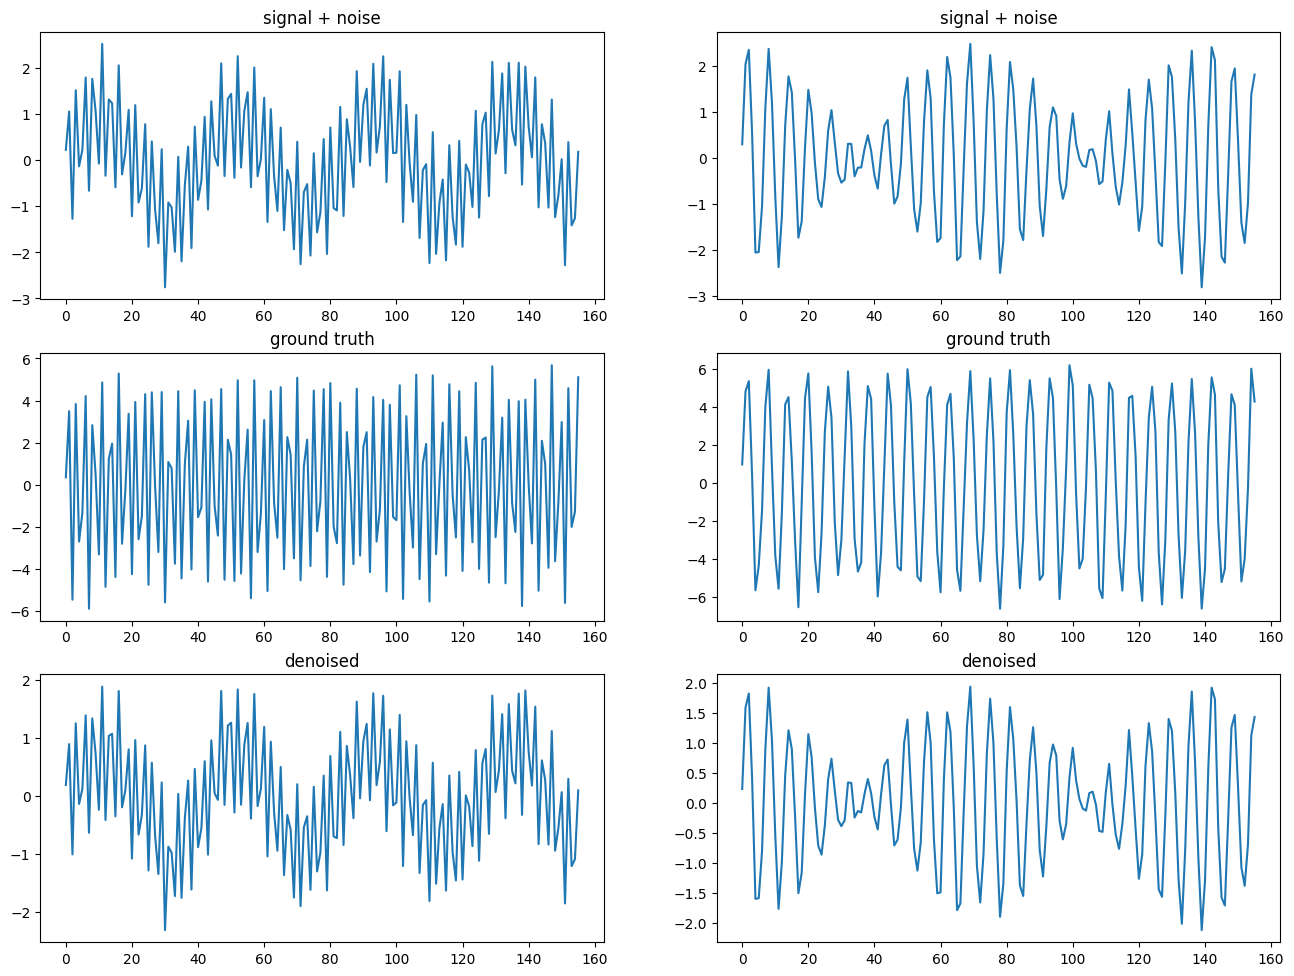

In [ ]:
x = [i for i in range(156)]
plt.figure(figsize = (16,16))
plt.subplot(4,2,1)
plt.plot(x,observation_list[40],'-')
plt.title('signal + noise')
plt.subplot(4,2,2)
plt.plot(x,observation_list[2],'-')
plt.title('signal + noise')
plt.subplot(4,2,3)
plt.plot(x,ground_truth_list[40],'-')
plt.title('ground truth')
plt.subplot(4,2,4)
plt.plot(x,ground_truth_list[2],'-')
plt.title('ground truth')
plt.subplot(4,2,5)
plt.plot(x,func_denoised[40],'-')
plt.title('denoised')
plt.subplot(4,2,6)
plt.plot(x,func_denoised[2],'-')
plt.title('denoised')

([], [])

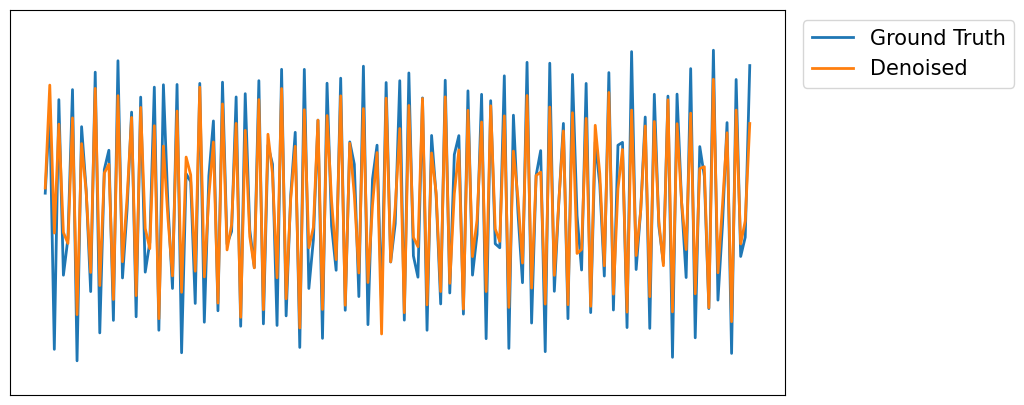

In [ ]:
x = [i for i in range(156)]
fig,ax = plt.subplots(figsize = (10,5))
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
plt.plot(x,gt_list[40],'-', label = 'Ground Truth',linewidth=2)
plt.plot(x,outputs_test_n[40].squeeze().cpu().detach().numpy(),'-',label = 'Denoised',linewidth=2)
# plt.legend(loc='upper right', prop={'size': 15})
# plt.plot(x,gt_list[40],'-',linewidth=2)
# plt.plot(x,func_denoised[40],'-',linewidth=2)
# plt.annotate('local max', textcoords='axes fraction',
#             horizontalalignment='right', verticalalignment='top',
#             )
plt.legend(prop={'size': 15},bbox_to_anchor=(1.01, 1), loc='upper left')
plt.ylim([-2, 2])
plt.xticks([], [])
plt.yticks([], [])
#plt.savefig('drive/MyDrive/dataset/z+c(s)_std=1/comparison_deepcorr.png',dpi=500)
# plt.savefig('drive/MyDrive/dataset/z+c(s)_std=1/comparison_compcorr.png',dpi=500)

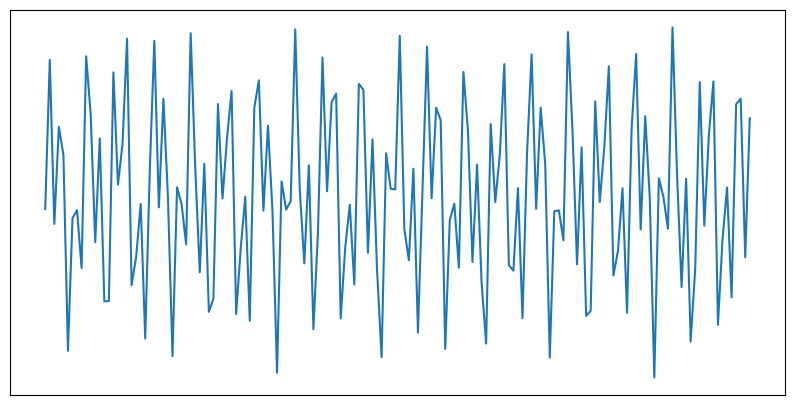

In [ ]:
fig,ax = plt.subplots(figsize = (10,5))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# plt.plot(x,gt_list[40],'-', label = 'ground truth')
# plt.plot(x,outputs_test_n[40].squeeze().cpu().detach().numpy(),'-',label = 'DeepCorr')
# plt.legend(loc='upper right', prop={'size': 20})
plt.plot(x,func_denoised[24],'-')
plt.savefig('drive/MyDrive/dataset/z+s_std=1/CompCorr.png',dpi=500)

In [ ]:
print(correlation(gt_list,func_denoised))

(0.7409892769329891, 0.6256465397230493, 0.8749993324227016)


In [ ]:
denoi_scale = Scaler(func_denoised)
func_denoised_n = obs_scale.transform(func_denoised)

In [ ]:
error = mean_squared_error(func_denoised_n, gt_list)
print(error)

0.4538077911892151


In [ ]:
savetxt('drive/MyDrive/dataset/z+s_std=1/denoised_CompCor.csv', func_denoised, delimiter=',')

#Wilcoxon Test z+s std=1

In [ ]:
import scipy

In [ ]:
def r_squared(x,y):
  x_mean = np.repeat(np.reshape(x.mean(axis=1),(x.shape[0],1)),x.shape[1],axis=1)
  y_mean = np.repeat(np.reshape(y.mean(axis=1),(y.shape[0],1)),y.shape[1],axis=1)
  cov = (x-x_mean)*(y-y_mean)
  r_row = cov.sum(axis=1)/(x.std(axis=1)*y.std(axis=1)*x.shape[1])
  return np.square(r_row)

In [ ]:
gt_list = np.loadtxt('drive/MyDrive/dataset/z+s_std=1/GroundTruth.csv',delimiter=",", dtype=float)
outputs_test = np.loadtxt('drive/MyDrive/dataset/z+s_std=1/denoised_DeepCor.csv',delimiter=",", dtype=float)
func_denoised = np.loadtxt('drive/MyDrive/dataset/z+s_std=1/denoised_CompCor.csv',delimiter=",", dtype=float)

In [ ]:
r_squared_DeepCor = r_squared(gt_list,outputs_test)
r_squared_CompCor = r_squared(gt_list,func_denoised)

In [ ]:
print(r_squared_DeepCor.shape)

(10000,)


In [ ]:
scipy.stats.wilcoxon(x=r_squared_DeepCor, y=r_squared_CompCor,alternative='greater')

WilcoxonResult(statistic=50004996.0, pvalue=0.0)

In [ ]:
scipy.stats.wilcoxon(x=r_squared_DeepCor, y=r_squared_CompCor,alternative='two-sided')

WilcoxonResult(statistic=4.0, pvalue=0.0)

In [ ]:
scipy.stats.ttest_rel(r_squared_DeepCor, r_squared_CompCor, alternative='greater')

TtestResult(statistic=337.27048697079346, pvalue=0.0, df=9999)

In [ ]:
scipy.stats.ttest_rel(r_squared_DeepCor, r_squared_CompCor, alternative='two-sided')

TtestResult(statistic=337.27048697079346, pvalue=0.0, df=9999)